In [48]:
from lab1_proto import mfcc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from feature_corr import concat_all_features
from lab1_proto import mfcc


In [49]:
data = np.load('data/lab1_data.npz')['data']

In [55]:
def get_test_data(data, digit):
    """
    Args:
        digit: the string of the target digit
    """
    ret = None
    for d in data:
        if d['digit'] == digit:
            features = mfcc(d['samples'], samplingrate=d['samplingrate'])

            if ret is None:
                ret = features
            else:
                ret = np.concatenate((ret, features), axis=0)
    return ret

In [57]:
    data = np.load('data/lab1_data.npz')['data']
    all_features = concat_all_features(data, feature="mfcc")

    test_data = get_test_data(data, digit='7')

    clf = GaussianMixture(32, covariance_type='diag', verbose=1)
    # train
    clf.fit(all_features)

Initialization 0
  Iteration 10
  Iteration 20
Initialization converged: True


GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=32, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=1,
        verbose_interval=10, warm_start=False, weights_init=None)

In [58]:
cov = clf.covariances_
means = clf.means_

In [60]:
cov.shape

(32, 13)

In [61]:
x = np.arange(-200,200,1)

In [62]:
import scipy.stats

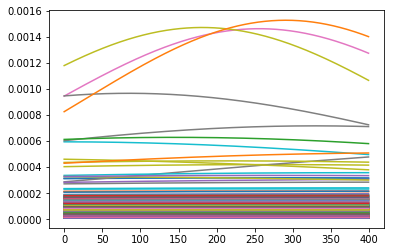

In [63]:
for i in range(32):
    for j in range(means.shape[1]):
        plt.plot(scipy.stats.norm.pdf(x,means[i,j],cov[i,j]))

In [76]:
test_feature = mfcc(data[16]['samples'])

In [77]:
post = clf.predict_proba(test_feature)

In [78]:
post.shape

(92, 32)

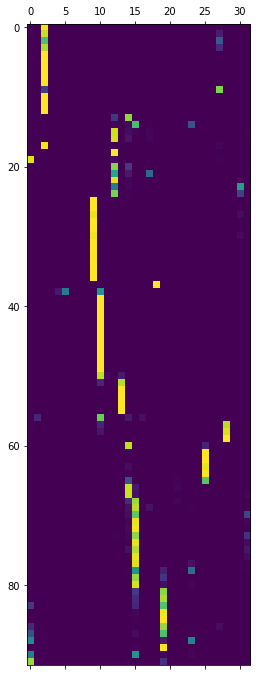

In [79]:
plt.matshow(post)

In [80]:
test_feature = mfcc(data[17]['samples'])

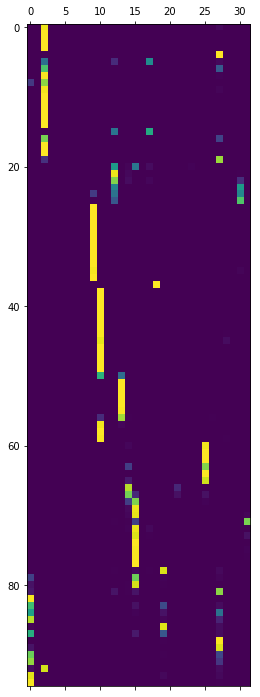

In [81]:
post = clf.predict_proba(test_feature)
plt.matshow(post)

In [82]:
test_feature.shape

(95, 13)

In [ ]:
test_feature = mfcc(data[17]['samples'])
post = clf.predict_proba(test_feature)
plt.matshow(post)